calculates secondary emission zone of a wire, the SEY and the SEY dependence on proton energy plot

2024.05.29, mariusz.sapinski@psi.ch

In [1]:
from Modules import SecondaryElectrons as se
from Modules import MaterialBank as mb
from Modules import NecessaryVariables as nv
from Modules import BetheBloch as bb
from Modules import ParticleBank as pb
from matplotlib import pyplot as plt


ParticleBank debug: ParticleFileName is: ParticleInfo/Default.txt


In [2]:
#nv.Material = mb.Material("MaterialInfo/Carbon.txt")
nv.Material = mb.Material("MaterialInfo/Dexmat.txt") # Dexmat Galvorn
#nv.Material = mb.Material("MaterialInfo/Molybdenum.txt")
#nv.Material = mb.Material("MaterialInfo/Tungsten.txt")

MaterialBank Emissivity for segments of the target: 
[[0]]
MaterialBank Cp for segments of the target: 
[[0]]
MaterialBank Wf for segments of the target: 
300, 4


In [3]:
print("target material density [g/cm3] = ",nv.Material.rho)
print("target material Z = ",nv.Material.Z)

# elecgtron penetration depth in nm:
print("electron penetration depth [nm] = ",se.ElectronPenetrationLength()*1e7)

target material density [g/cm3] =  1.3
target material Z =  6.0
Nv [1/cm3] = 7.1457949994588165e+22
electron penetration depth [nm] =  2.092752542909253


In [4]:
# particle
particle = pb.Particle("ParticleInfo/Proton.txt")

ParticleBank debug: ParticleFileName is: ParticleInfo/Proton.txt


In [9]:
#nv.BEnergy=72  # [MeV]
nv.BEnergy=590  # [MeV]
#nv.BEnergy=3000  # [MeV]
#nv.BEnergy = 450000 # [MeV]
nv.enemat = bb.BetheBloch(particle, nv.BEnergy, nv.Material)
print("DEDX [MeV*cm2/g] = ",nv.enemat)

print("SEY = ",2*se.SecondaryElectronYield())

DEDX [MeV*cm2/g] =  1.6942792840236152
BEnergy_eV =  590000000.0
Nv [1/cm3] = 6.948906657963446e+22
SEY =  0.06109299492554012


In [7]:
# SEY as a function of proton energy

beneC=[]
seyC=[]

beneW=[]
seyW=[]

nv.Material = mb.Material("MaterialInfo/Carbon.txt")


nv.BEnergy=0.1
while nv.BEnergy < 1000000:  # 1 GeV
    nv.enemat = bb.BetheBloch(particle, nv.BEnergy, nv.Material)
    beneC.append(nv.BEnergy)
    seyC.append(se.SecondaryElectronYield())
    nv.BEnergy=nv.BEnergy+100
    
nv.Material = mb.Material("MaterialInfo/Tungsten.txt")    

nv.BEnergy=0.1
while nv.BEnergy < 1000000:  # 1 GeV
    nv.enemat = bb.BetheBloch(particle, nv.BEnergy, nv.Material)
    beneW.append(nv.BEnergy)
    seyW.append(se.SecondaryElectronYield())
    nv.BEnergy=nv.BEnergy+100




MaterialBank Emissivity for segments of the target: 
[[0]]
MaterialBank Cp for segments of the target: 
[[0]]
MaterialBank Wf for segments of the target: 
300, 5
BEnergy_eV =  100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  100100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  200100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  300100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  400100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  500100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  600100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  700100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  800100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  900100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  1000100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  1100100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  1200100000.0
Nv [1/cm3] = 1.0993530768398177e+23
BEnergy_eV =  1300100000.0
Nv [1

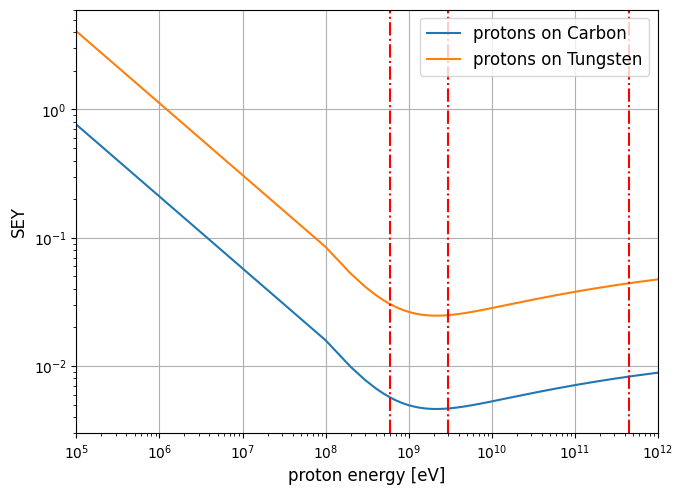

In [8]:
ylimd=3e-3
ylimu=6
fig, ax = plt.subplots(1, figsize=(7.5,5.5))
ax.plot([e*1e6 for e in beneC],seyC,label="protons on Carbon")
ax.plot([e*1e6 for e in beneW],seyW,label="protons on Tungsten")
ax.set_xlabel("proton energy [eV]",fontsize=12)
ax.set_ylabel("SEY",fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e5,1e12)
ax.set_ylim(ylimd,ylimu)
ax.legend(fontsize=12)
plt.vlines(590*1e6,ylimd,ylimu, color='red',linestyles='dashdot')
plt.vlines(3000*1e6,ylimd,ylimu, color='red',linestyles='dashdot')
plt.vlines(450e3*1e6,ylimd,ylimu, color='red',linestyles='dashdot')
ax.grid()
#plt.saveas
